In [1]:
import numpy as np
import algorithms
import functions
from optSolver import optSolver_Yu_Fang
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define three class objects required in 'optSolver_Yu_Fang' and their attributes 

class Problem:
    def __init__(self, name, x0):
        self.name = name
        self.x0 = x0
        self.n = len(x0) # dimension (2D or 10D)
        
        if self.n == 2:
            match name:
                case "Rosenbrock":
                    self.compute_f = functions.rosen_func
                    self.compute_g = functions.rosen_grad
                    self.compute_H = functions.rosen_Hess
                case "Quadratic_2D":
                    self.compute_f = functions.quad_func_quad2
                    self.compute_g = functions.quad_grad_quad2
                    self.compute_H = functions.quad_Hess_quad2
                case _:
                    raise ValueError("problem not defined!!!")
        elif self.n == 10:
            match name:
                case "Quadratic_10D":
                    self.compute_f = functions.quad_func_quad10
                    self.compute_g = functions.quad_grad_quad10
                    self.compute_H = functions.quad_Hess_quad10
                case _:
                    raise ValueError("problem not defined!!!")
        else:
            raise ValueError("dimension not defined!!!")
                
class Method:
    def __init__(self, name, **options):
        self.name = name
        self.options = options
        
class Options:
    def __init__(self,term_tol=1e-6, max_iterations=1e2):
        self.term_tol = term_tol # epsilon
        self.max_iterations = max_iterations  

In [3]:
# initialization of Rosenbrock problem
x0 = np.array([1.2, 1.2])
x_star = np.array([1, 1])
problem = Problem('Rosenbrock', x0=x0)
f_star_rosenbrock = functions.rosen_func(x_star)

In [4]:
# Rosenbrock problem:
# Gradient Descent(with constant step size)
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-3)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_gd_constant = [val - f_star_rosenbrock for val in f_history]

In [5]:
# Rosenbrock problem:
# Gradient Descent(with a backtracking line search)
method = Method('GradientDescent', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_gd_backtracking = [val - f_star_rosenbrock for val in f_history]

In [6]:
# Rosenbrock problem:
# Newton's method(with a backtracking line search)
method = Method('Newton', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_newton_backtracking = [val - f_star_rosenbrock for val in f_history]


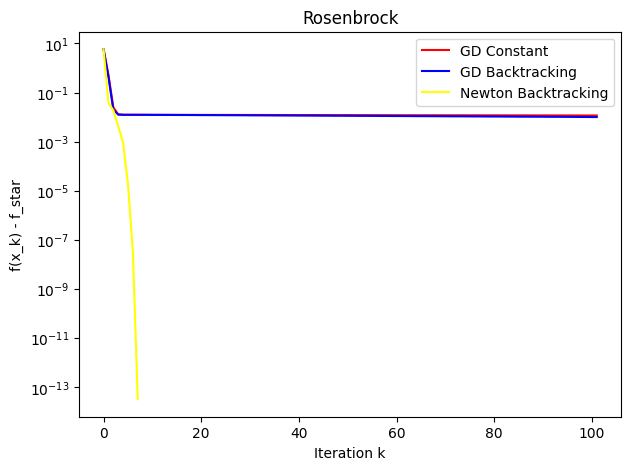

In [7]:
plt.figure(figsize=(7, 5))

plt.plot(range(len(results_rosenbrock_gd_constant)), results_rosenbrock_gd_constant, label="GD Constant", color='red')
plt.plot(range(len(results_rosenbrock_gd_backtracking)), results_rosenbrock_gd_backtracking, label="GD Backtracking", color='blue')
plt.plot(range(len(results_rosenbrock_newton_backtracking)), results_rosenbrock_newton_backtracking, label="Newton Backtracking", color='yellow')


# Set y-axis to log scale
plt.yscale('log')

plt.xlabel("Iteration k")
plt.ylabel("f(x_k) - f_star")
plt.title("Rosenbrock")
plt.legend()

plt.show()


In [6]:
# Experiments with constant step size for Rosenbrock problem, Gradient Descent with constant step size
# choose 1e-3
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-3)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_gd_constant3 = [val - f_star_rosenbrock for val in f_history]

In [7]:
# choose 1e-4
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_gd_constant4 = [val - f_star_rosenbrock for val in f_history]

In [8]:
# choose 1e-5
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-5)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_gd_constant5 = [val - f_star_rosenbrock for val in f_history]

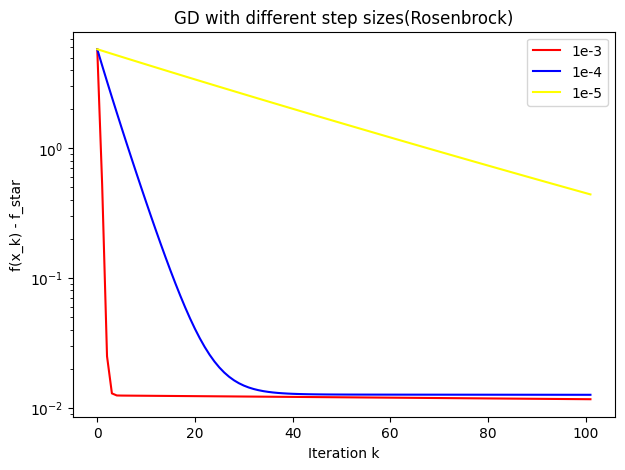

In [9]:
plt.figure(figsize=(7, 5))

plt.plot(range(len(results_rosenbrock_gd_constant3)), results_rosenbrock_gd_constant3, label="1e-3", color='red')
plt.plot(range(len(results_rosenbrock_gd_constant4)), results_rosenbrock_gd_constant4, label="1e-4", color='blue')
plt.plot(range(len(results_rosenbrock_gd_constant5)), results_rosenbrock_gd_constant5, label="1e-5", color='yellow')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel("Iteration k")
plt.ylabel("f(x_k) - f_star")
plt.title("GD with different step sizes(Rosenbrock)")
plt.legend()

# Show the plot
plt.show()

In [3]:
# Initialization of Quadratic_2D problem
data = scipy.io.loadmat('quadratic2.mat')
x0 = data['x_0']
x_star = data['x_star']
problem = Problem('Quadratic_2D', x0=x0)
f_star_quad2D = functions.quad_func_quad2(x_star)

In [4]:
# Quadratic_2D problem:
# Experiments with 1e-3
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-3)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad2D_gd_constant = [val - f_star_quad2D for val in f_history]

In [5]:
# Quadratic_2D problem:
# Experiements with 1e-4
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad2D_gd_constant4 = [val - f_star_quad2D for val in f_history]

In [6]:
# Quadratic_2D problem:
# Experiments with 1e-5
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-5)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad2D_gd_constant5 = [val - f_star_quad2D for val in f_history]

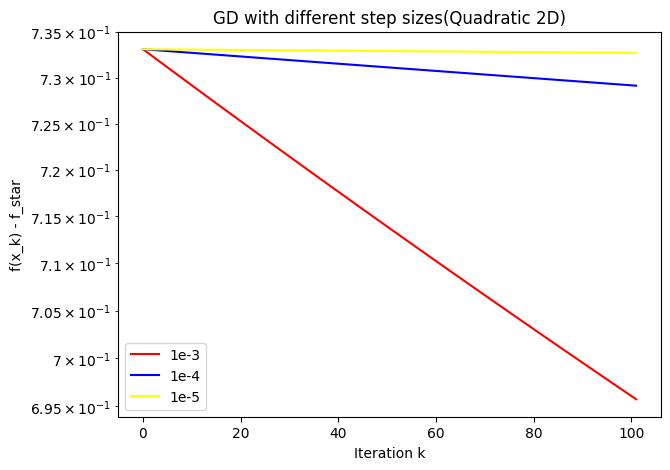

In [7]:
plt.figure(figsize=(7, 5))

plt.plot(range(len(results_quad2D_gd_constant)), results_quad2D_gd_constant, label="1e-3", color='red')
plt.plot(range(len(results_quad2D_gd_constant4)), results_quad2D_gd_constant4, label="1e-4", color='blue')
plt.plot(range(len(results_quad2D_gd_constant5)), results_quad2D_gd_constant5, label="1e-5", color='yellow')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel("Iteration k")
plt.ylabel("f(x_k) - f_star")
plt.title("GD with different step sizes(Quadratic 2D)")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [73]:
# Gradient descent with backtracking, Quadratic_2D problem
method = Method('GradientDescent', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad2D_gd_backtracking = [val - f_star_quad2D for val in f_history]

In [74]:
# Newton's method, Quadratic_2D problem
method = Method('Newton', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad2D_newton_backtracking = [val - f_star_quad2D for val in f_history]


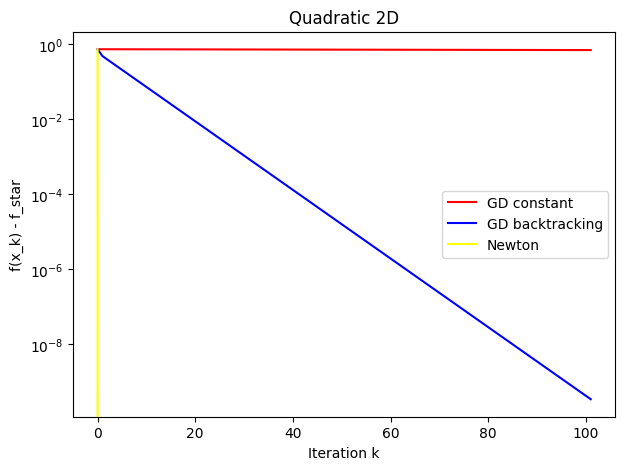

In [75]:
plt.figure(figsize=(7, 5))

plt.plot(range(len(results_quad2D_gd_constant)), results_quad2D_gd_constant, label="GD constant", color='red')
plt.plot(range(len(results_quad2D_gd_backtracking)), results_quad2D_gd_backtracking, label="GD backtracking", color='blue')
plt.plot(range(len(results_quad2D_newton_backtracking)), results_quad2D_newton_backtracking, label="Newton", color='yellow')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel("Iteration k")
plt.ylabel("f(x_k) - f_star")
plt.title("Quadratic 2D")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [3]:
# Initialization of Quadratic_10D problem
data = scipy.io.loadmat('quadratic10.mat')
x0 = data['x_0']
x_star = data['x_star']
problem = Problem('Quadratic_10D', x0=x0)
f_star_quad10D = functions.quad_func_quad10(x_star)

In [4]:
# Experiments with 1e-3
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-3)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad10D_gd_constant = [val - f_star_quad10D for val in f_history]

In [5]:
# Experiments with 1e-4
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad10D_gd_constant4 = [val - f_star_quad10D for val in f_history]

In [6]:
# Experiments with 1e-5
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-5)
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad10D_gd_constant5 = [val - f_star_quad10D for val in f_history]

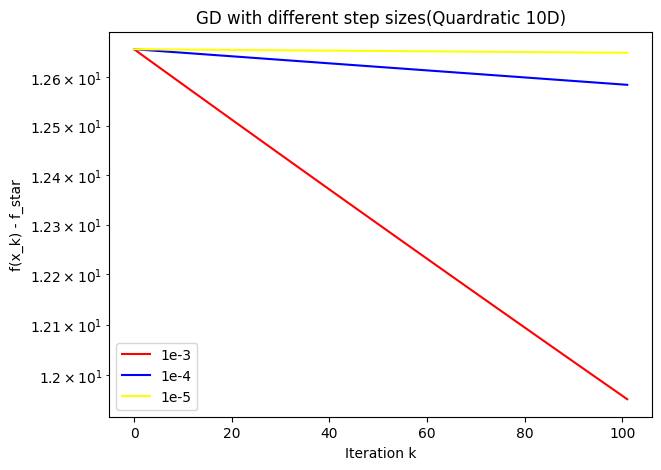

In [7]:
plt.figure(figsize=(7, 5))

plt.plot(range(len(results_quad10D_gd_constant)), results_quad10D_gd_constant, label="1e-3", color='red')
plt.plot(range(len(results_quad10D_gd_constant4)), results_quad10D_gd_constant4, label="1e-4", color='blue')
plt.plot(range(len(results_quad10D_gd_constant5)), results_quad10D_gd_constant5, label="1e-5", color='yellow')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel("Iteration k")
plt.ylabel("f(x_k) - f_star")
plt.title("GD with different step sizes(Quardratic 10D)")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [78]:
# Gradient Descent with backtracking line search, Quadratic_10D problem
method = Method('GradientDescent', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad10D_gd_backtracking = [val - f_star_quad10D for val in f_history]

In [79]:
# Newton's method, Quadratic_10D problem
method = Method('Newton', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_quad10D_newton_backtracking = [val - f_star_quad10D for val in f_history]

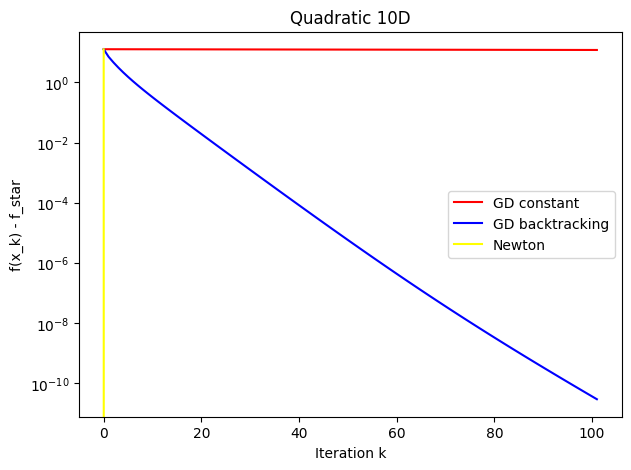

In [81]:
plt.figure(figsize=(7, 5))

plt.plot(range(len(results_quad10D_gd_constant)), results_quad10D_gd_constant, label="GD constant", color='red')
plt.plot(range(len(results_quad10D_gd_backtracking)), results_quad10D_gd_backtracking, label="GD backtracking", color='blue')
plt.plot(range(len(results_quad10D_newton_backtracking)), results_quad10D_newton_backtracking, label="Newton", color='yellow')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel("Iteration k")
plt.ylabel("f(x_k) - f_star")
plt.title("Quadratic 10D")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [45]:
# Rosenbrock problem with differnt starting point:
# Consider the GD backtracking method
# (1.2,1.2)
results_rosenbrock_gd_backtracking

[np.float64(24.199999999999996),
 np.float64(5.101112663710957),
 np.float64(5.047011137654621),
 np.float64(4.1140390714609625),
 np.float64(4.108085021297817),
 np.float64(4.10215271407615),
 np.float64(4.096128168072973),
 np.float64(4.090124601875364),
 np.float64(4.084010868429543),
 np.float64(4.077917974154677),
 np.float64(4.071704078295341),
 np.float64(4.0655117295061824),
 np.float64(4.059196654188367),
 np.float64(4.05290466720313),
 np.float64(4.046497767824331),
 np.float64(4.040116076148679),
 np.float64(4.033635518460498),
 np.float64(4.027182424802862),
 np.float64(4.020652018857255),
 np.float64(4.014150935882753),
 np.float64(4.007596145075363),
 np.float64(4.001071623995189),
 np.float64(3.994515687424457),
 np.float64(3.9879896712780982),
 np.float64(3.981450654418406),
 np.float64(3.9812454208872077),
 np.float64(3.972546268074264),
 np.float64(3.9644485660897555),
 np.float64(3.9562913203442953),
 np.float64(3.9485717459384095),
 np.float64(3.9408988930986575),
 

In [46]:
# Newton
# (1.2,1.2)
results_rosenbrock_newton_backtracking

[np.float64(24.199999999999996),
 np.float64(4.731884325266608),
 np.float64(4.087398662072065),
 np.float64(3.2286725886219974),
 np.float64(3.2138980914446202),
 np.float64(1.9425854206218367),
 np.float64(1.6001936936471652),
 np.float64(1.178389561005625),
 np.float64(0.922411581922141),
 np.float64(0.5974886167901255),
 np.float64(0.4526250978303169),
 np.float64(0.28076243818862784),
 np.float64(0.2113933964203995),
 np.float64(0.08901950131670533),
 np.float64(0.05153540487523918),
 np.float64(0.01999277796828192),
 np.float64(0.007169243633361913),
 np.float64(0.0010696136791421248),
 np.float64(7.776846403659599e-05),
 np.float64(2.824669491449053e-07),
 np.float64(8.51707498008425e-12)]

In [47]:
# (-0.001, -0.001)
# GD backtracking
x0 = np.array([-0.001, -0.001])
x_star = np.array([1, 1])
problem = Problem('Rosenbrock', x0=x0)
f_star_rosenbrock = functions.rosen_func(x_star)
method = Method('GradientDescent', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_gd_backtracking_001 = [val - f_star_rosenbrock for val in f_history]

In [48]:
# (-0.001, -0.001)
# Newton
x0 = np.array([-0.001, -0.001])
x_star = np.array([1, 1])
problem = Problem('Rosenbrock', x0=x0)
f_star_rosenbrock = functions.rosen_func(x_star)
method = Method('Newton', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_newton_backtracking_001 = [val - f_star_rosenbrock for val in f_history]


In [31]:
# (0.99, 0.99)
# GD backtracking
x0 = np.array([0.99, 0.99])
x_star = np.array([1, 1])
problem = Problem('Rosenbrock', x0=x0)
f_star_rosenbrock = functions.rosen_func(x_star)
method = Method('GradientDescent', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_gd_backtracking_99 = [val - f_star_rosenbrock for val in f_history]

In [49]:
# (0.99, 0.99)
# Newton
x0 = np.array([0.99, 0.99])
x_star = np.array([1, 1])
problem = Problem('Rosenbrock', x0=x0)
f_star_rosenbrock = functions.rosen_func(x_star)
method = Method('Newton', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_newton_backtracking_99 = [val - f_star_rosenbrock for val in f_history]

In [50]:
# (-1.2, 1)
# GD backtracking
x0 = np.array([-1.2, 1])
x_star = np.array([1, 1])
problem = Problem('Rosenbrock', x0=x0)
f_star_rosenbrock = functions.rosen_func(x_star)
method = Method('GradientDescent', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_gd_backtracking_121 = [val - f_star_rosenbrock for val in f_history]

In [51]:
# (-1.2, 1)
# Newton
x0 = np.array([-1.2, 1])
x_star = np.array([1, 1])
problem = Problem('Rosenbrock', x0=x0)
f_star_rosenbrock = functions.rosen_func(x_star)
method = Method('Newton', step_type='Backtracking')
options = Options(term_tol=1e-6, max_iterations=1e2) 
x, f, f_history = optSolver_Yu_Fang(problem, method, options)
results_rosenbrock_newton_backtracking_121 = [val - f_star_rosenbrock for val in f_history]

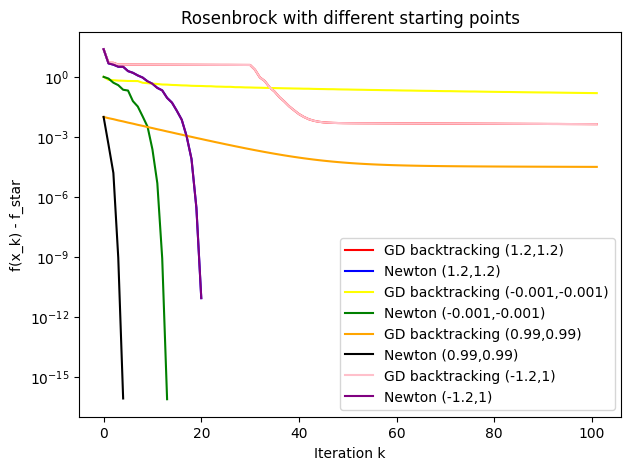

In [59]:
plt.figure(figsize=(7, 5))

plt.plot(range(len(results_rosenbrock_gd_backtracking)), results_rosenbrock_gd_backtracking, label="GD backtracking (1.2,1.2)", color='red')
plt.plot(range(len(results_rosenbrock_newton_backtracking)), results_rosenbrock_newton_backtracking, label="Newton (1.2,1.2)", color='blue')
plt.plot(range(len(results_rosenbrock_gd_backtracking_001)), results_rosenbrock_gd_backtracking_001, label="GD backtracking (-0.001,-0.001)", color='yellow')
plt.plot(range(len(results_rosenbrock_newton_backtracking_001)), results_rosenbrock_newton_backtracking_001, label="Newton (-0.001,-0.001)", color='green')
plt.plot(range(len(results_rosenbrock_gd_backtracking_99)), results_rosenbrock_gd_backtracking_99, label="GD backtracking (0.99,0.99)", color='orange')
plt.plot(range(len(results_rosenbrock_newton_backtracking_99)), results_rosenbrock_newton_backtracking_99, label="Newton (0.99,0.99)", color='black')
plt.plot(range(len(results_rosenbrock_gd_backtracking_121)), results_rosenbrock_gd_backtracking_121, label="GD backtracking (-1.2,1)", color='pink')
plt.plot(range(len(results_rosenbrock_newton_backtracking_121)), results_rosenbrock_newton_backtracking_121, label="Newton (-1.2,1)", color='purple')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel("Iteration k")
plt.ylabel("f(x_k) - f_star")
plt.title("Rosenbrock with different starting points")

# Add a legend
plt.legend()

# Show the plot
plt.show()